In [ ]:
# load dataset

import pandas as pd

hdb_resale = pd.read_csv("01_hdb_resale_transactions.csv")
hdb_resale.head()

block           street_name        town  postal_code    month flat_type  \
0   174   ANG MO KIO AVENUE 4  ANG MO KIO       560174  2015-01    3 ROOM   
1   541  ANG MO KIO AVENUE 10  ANG MO KIO       560541  2015-01    3 ROOM   
2   163   ANG MO KIO AVENUE 4  ANG MO KIO       560163  2015-01    3 ROOM   
3   446  ANG MO KIO AVENUE 10  ANG MO KIO       560446  2015-01    3 ROOM   
4   557  ANG MO KIO AVENUE 10  ANG MO KIO       560557  2015-01    3 ROOM   

  storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0     07 TO 09            60.0        Improved                 1986   
1     01 TO 03            68.0  New Generation                 1981   
2     01 TO 03            69.0  New Generation                 1980   
3     01 TO 03            68.0  New Generation                 1979   
4     07 TO 09            68.0  New Generation                 1980   

   resale_price  latitude   longitude      cbd_dist  min_dist_mrt  
0      255000.0  1.375097  103.837619  10296.855750   1096.947897  
1      275000.0  1.373922  103.855621  10065.227930    847.235690  
2      285000.0  1.373552  103.838169  10118.831550   1176.742184  
3      290000.0  1.367761  103.855357   9383.300907    682.205473  
4      290000.0  1.371626  103.857736   9825.917255    953.047695

## Data Exploratory

1. Understand Summary of data
2. Understand the Statitistic of the data
3. Check for duplicates
4. Visualisation to find for outliers or missing values

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(hdb_resale, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# From the above, there are about 0.2% of the data are duplicated which indicates the needs for removal.
hdb_resale.drop_duplicates(inplace=True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 1, 'postal_code'),
  Text(1.5, 1, 'floor_area_sqm'),
  Text(2.5, 1, 'lease_commence_date'),
  Text(3.5, 1, 'resale_price'),
  Text(4.5, 1, 'latitude'),
  Text(5.5, 1, 'longitude'),
  Text(6.5, 1, 'cbd_dist'),
  Text(7.5, 1, 'min_dist_mrt')])

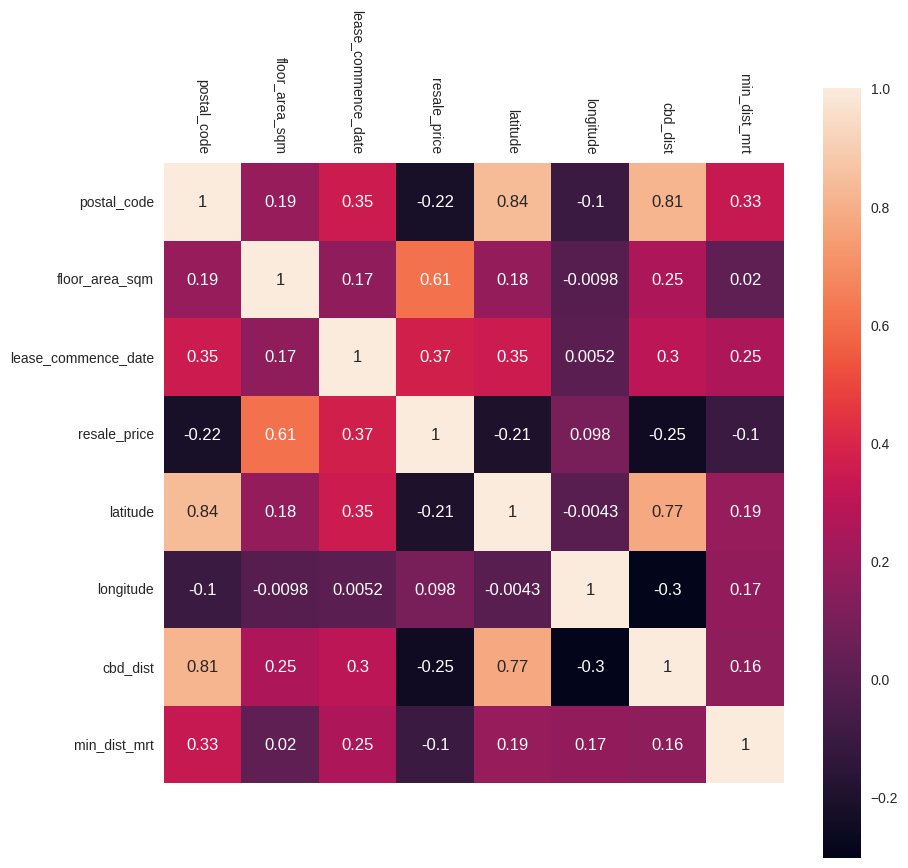

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = hdb_resale.corr()
fig, ax = plt.subplots(figsize=(10, 10))
corr_plot = sns.heatmap(corr, square=True, annot = True)
corr_plot.xaxis.set_ticks_position("top")
plt.xticks(rotation=-90)

In [ ]:
from pycaret.regression import *

hdb_exp = setup(data = hdb_resale, target = 'resale_price', session_id=123,
                profile=True, log_experiment = True, experiment_name = 'hdb_resale',
                normalize = True,
                ignore_features=['latitude', 'longitude', 'flat_type'])

Loading profile... Please Wait!


2023/08/16 10:15:57 INFO mlflow.tracking.fluent: Experiment with name 'hdb_resale' does not exist. Creating a new experiment.


In [ ]:
hdb_exp.data.dtypes

block                  category
street_name            category
town                   category
postal_code               int32
month                  category
flat_type              category
storey_range           category
floor_area_sqm          float32
flat_model             category
lease_commence_date       int32
latitude                float32
longitude               float32
cbd_dist                float32
min_dist_mrt            float32
resale_price            float32
dtype: object

In [ ]:
hdb_exp.get_config('dataset_transformed')

block  street_name      town  postal_code     month  \
187484  1.391155     1.653045 -0.657269    -0.503599  1.960196   
54953  -0.222555     0.121489  0.416440    -0.203776 -0.631274   
189486 -0.074548     0.460977 -0.145977    -0.152355  1.976087   
146808  0.068665    -0.256222  0.020737    -0.094331  0.998896   
47842   0.147980    -0.117282  0.416440    -0.202999 -0.887416   
...          ...          ...       ...          ...       ...   
165537 -0.295156     0.272956  0.416440    -0.204921  1.695255   
158549 -0.110223     0.083000  0.336774     1.390861  1.201327   
118527 -0.015660     0.170056  0.020737    -0.093759  0.094298   
60308  -1.054252    -0.785789 -0.751823     1.004243 -0.355905   
182186 -0.595030    -0.693072  1.877938    -2.094566  1.743922   

        storey_range_10 TO 12  storey_range_07 TO 09  storey_range_04 TO 06  \
187484               2.085863              -0.520834              -0.549105   
54953               -0.479418               1.919996              -0.549105   
189486              -0.479418               1.919996              -0.549105   
146808              -0.479418              -0.520834               1.821146   
47842                2.085863              -0.520834              -0.549105   
...                       ...                    ...                    ...   
165537               2.085863              -0.520834              -0.549105   
158549              -0.479418              -0.520834              -0.549105   
118527              -0.479418               1.919996              -0.549105   
60308               -0.479418              -0.520834              -0.549105   
182186              -0.479418               1.919996              -0.549105   

        storey_range_22 TO 24  storey_range_01 TO 03  ...  \
187484              -0.115742              -0.466645  ...   
54953               -0.115742              -0.466645  ...   
189486              -0.115742              -0.466645  ...   
146808              -0.115742              -0.466645  ...   
47842               -0.115742              -0.466645  ...   
...                       ...                    ...  ...   
165537              -0.115742              -0.466645  ...   
158549              -0.115742              -0.466645  ...   
118527              -0.115742              -0.466645  ...   
60308               -0.115742               2.142956  ...   
182186              -0.115742              -0.466645  ...   

        flat_model_Multi Generation  flat_model_Terrace  flat_model_3Gen  \
187484                    -0.019766           -0.023357        -0.007678   
54953                     -0.019766           -0.023357        -0.007678   
189486                    -0.019766           -0.023357        -0.007678   
146808                    -0.019766           -0.023357        -0.007678   
47842                     -0.019766           -0.023357        -0.007678   
...                             ...                 ...              ...   
165537                    -0.019766           -0.023357        -0.007678   
158549                    -0.019766           -0.023357        -0.007678   
118527                    -0.019766           -0.023357        -0.007678   
60308                     -0.019766           -0.023357        -0.007678   
182186                    -0.019766           -0.023357        -0.007678   

        flat_model_2-room  flat_model_Improved-Maisonette  \
187484          -0.017595                       -0.011833   
54953           -0.017595                       -0.011833   
189486          -0.017595                       -0.011833   
146808          -0.017595                       -0.011833   
47842           -0.017595                       -0.011833   
...                   ...                             ...   
165537          -0.017595                       -0.011833   
158549          -0.017595                       -0.011833   
118527          -0.017595                       -0.011833   
60308        

In [ ]:
best = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

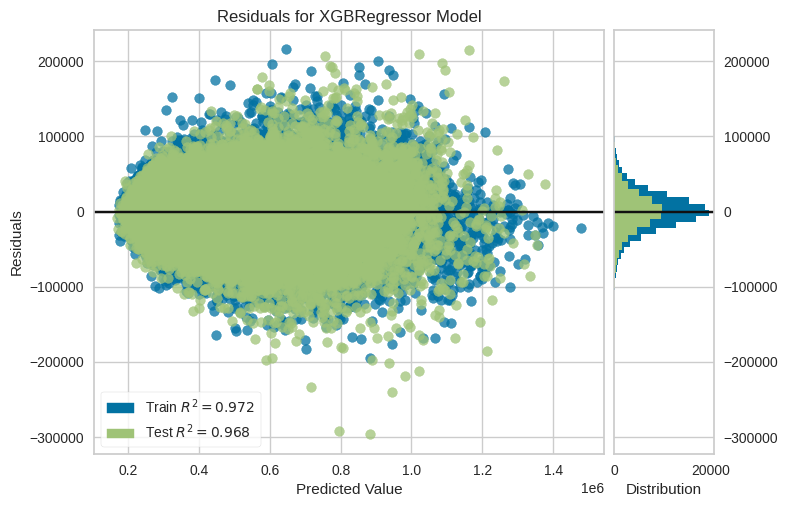

In [ ]:
plot_model(best, plot = 'residuals')

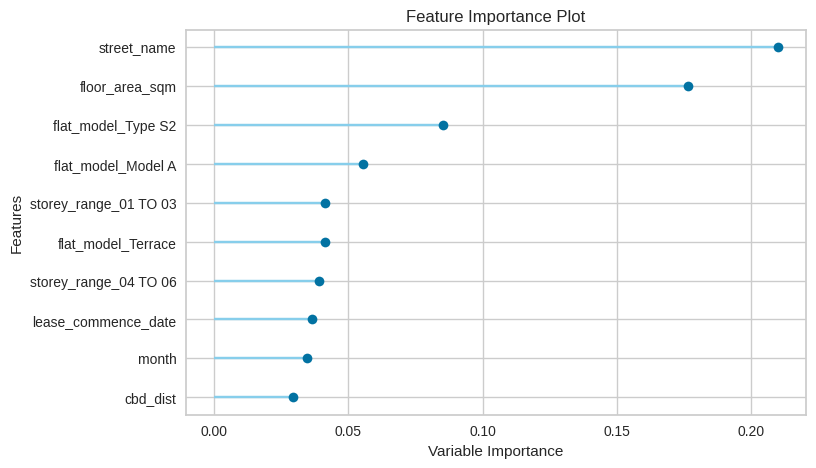

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
params = {

}

In [ ]:
tuned_best = tune_model(best)

Initiated  . . . . . . . . . . . . . . . . . .                   11:23:24
Status     . . . . . . . . . . . . . . . . . .  Searching Hyperparameters
Estimator  . . . . . . . . . . . . . . . . . .  Extreme Gradient Boosting

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: ignored

In [ ]:
print("Base and Tuned Model Parameters Comaprision\n",best, "\n", tuned_best)

In [ ]:
hdb_unseen = hdb_resale.copy()
hdb_unseen.drop('resale_price', axis = 1, inplace = True)
predictions = predict_model(best, data = hdb_unseen)

In [ ]:
!mlflow ui